# Uber Dataset

In [1]:
import pandas as pd
#Read in the dataset of july uber pickups
uber_data = pd.read_csv("Data/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
print(uber_data.head(10))

          Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512
5  7/1/2014 0:35:00  40.7487 -73.9869  B02512
6  7/1/2014 0:57:00  40.7444 -73.9961  B02512
7  7/1/2014 0:58:00  40.7132 -73.9492  B02512
8  7/1/2014 1:04:00  40.7590 -73.9730  B02512
9  7/1/2014 1:08:00  40.7601 -73.9823  B02512


In [2]:
#Convert the type of the column to datetime
uber_data["Date/Time"] = pd.to_datetime(uber_data["Date/Time"])

In [3]:
#Using a floor can round off the date-time into discrete increments
print(uber_data["Date/Time"].dt.floor('1H').head(10))

0   2014-07-01 00:00:00
1   2014-07-01 00:00:00
2   2014-07-01 00:00:00
3   2014-07-01 00:00:00
4   2014-07-01 00:00:00
5   2014-07-01 00:00:00
6   2014-07-01 00:00:00
7   2014-07-01 00:00:00
8   2014-07-01 01:00:00
9   2014-07-01 01:00:00
Name: Date/Time, dtype: datetime64[ns]


In [4]:
#Let's get value counts to see the number of trips at given times
print(uber_data["Date/Time"].dt.floor('1H').value_counts().head(10))

2014-07-15 18:00:00    3302
2014-07-15 19:00:00    3225
2014-07-15 17:00:00    3045
2014-07-02 18:00:00    2946
2014-07-15 20:00:00    2840
2014-07-23 20:00:00    2791
2014-07-23 21:00:00    2559
2014-07-31 18:00:00    2531
2014-07-23 17:00:00    2519
2014-07-02 17:00:00    2479
Name: Date/Time, dtype: int64


In [5]:
#And sort the data so it is chronological
hourly_data = uber_data["Date/Time"].dt.floor('1H').value_counts()
hourly_data = hourly_data.sort_index()
print(hourly_data.head(10))

2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
2014-07-01 05:00:00     348
2014-07-01 06:00:00     715
2014-07-01 07:00:00    1196
2014-07-01 08:00:00    1076
2014-07-01 09:00:00     885
Name: Date/Time, dtype: int64


In [6]:
import matplotlib.pyplot as plt
#Plotting the data shows some trend components
hourly_data.plot(kind="line")
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
#We are going to see the average number of trips for each hour/week day combination
#First split the date into the week day, hour and the actual date
hours = uber_data["Date/Time"].dt.hour
week_day = uber_data["Date/Time"].dt.weekday
date = uber_data["Date/Time"].dt.date
weekly_data = pd.concat([week_day, hours, date], axis=1)
weekly_data.columns = ["Week Day", "Hour", "Date"]

print(weekly_data.head(10))

   Week Day  Hour        Date
0         1     0  2014-07-01
1         1     0  2014-07-01
2         1     0  2014-07-01
3         1     0  2014-07-01
4         1     0  2014-07-01
5         1     0  2014-07-01
6         1     0  2014-07-01
7         1     0  2014-07-01
8         1     1  2014-07-01
9         1     1  2014-07-01


In [8]:
import calendar
#The calendar library can map the integer versions of calendar weekdays to the actual name
#0 -> Monday, 1 -> Tuesday, etc.
print(calendar.day_name[0])

Monday


In [9]:
#Map the name
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x])
print(weekly_data["Week Day"].head(10))

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
5    Tuesday
6    Tuesday
7    Tuesday
8    Tuesday
9    Tuesday
Name: Week Day, dtype: object


In [10]:
#By grouping by the date, week day, and hour we can aggregate the size (# of entries) on each date
weekly_data = weekly_data.groupby(["Date","Week Day", "Hour"]).size()
print(weekly_data.head(10))

Date        Week Day  Hour
2014-07-01  Tuesday   0        216
                      1        111
                      2         82
                      3        134
                      4        223
                      5        348
                      6        715
                      7       1196
                      8       1076
                      9        885
dtype: int64


In [11]:
#Reset the index
weekly_data = weekly_data.reset_index()
print(weekly_data.head(10))

         Date Week Day  Hour     0
0  2014-07-01  Tuesday     0   216
1  2014-07-01  Tuesday     1   111
2  2014-07-01  Tuesday     2    82
3  2014-07-01  Tuesday     3   134
4  2014-07-01  Tuesday     4   223
5  2014-07-01  Tuesday     5   348
6  2014-07-01  Tuesday     6   715
7  2014-07-01  Tuesday     7  1196
8  2014-07-01  Tuesday     8  1076
9  2014-07-01  Tuesday     9   885


In [12]:
#Rename 0, the default column name to be size
weekly_data = weekly_data.rename(columns={0: "Size"})
print(weekly_data.head(10))

         Date Week Day  Hour  Size
0  2014-07-01  Tuesday     0   216
1  2014-07-01  Tuesday     1   111
2  2014-07-01  Tuesday     2    82
3  2014-07-01  Tuesday     3   134
4  2014-07-01  Tuesday     4   223
5  2014-07-01  Tuesday     5   348
6  2014-07-01  Tuesday     6   715
7  2014-07-01  Tuesday     7  1196
8  2014-07-01  Tuesday     8  1076
9  2014-07-01  Tuesday     9   885


In [13]:
#Now we can group by the week day and average to get the mean for each week day/hour
weekly_data = weekly_data.groupby(["Week Day", "Hour"]).mean()["Size"]
print(weekly_data.head(10))

Week Day  Hour
Friday    0        615.00
          1        385.25
          2        264.75
          3        307.50
          4        339.75
          5        497.25
          6        736.75
          7       1008.00
          8       1038.00
          9        907.75
Name: Size, dtype: float64


In [14]:
#Unstack takes a level of the index and translates it to be a column
#We pick level=0 because we want the week day name to be the column
weekly_data = weekly_data.unstack(level=0)
print(weekly_data)

Week Day   Friday   Monday  Saturday   Sunday  Thursday  Tuesday  Wednesday
Hour                                                                       
0          615.00   315.00   1110.25  1090.00     430.0    301.8      354.6
1          385.25   153.25    788.25   829.50     231.4    155.8      193.2
2          264.75   109.75    580.00   638.25     171.0    111.2      156.0
3          307.50   254.75    426.00   477.00     256.6    187.0      224.0
4          339.75   403.75    271.75   245.50     376.8    296.6      326.0
5          497.25   615.25    274.25   231.25     586.2    546.0      559.8
6          736.75   911.00    303.50   256.75     959.2    962.2     1003.4
7         1008.00  1266.50    398.50   316.25    1341.8   1350.0     1425.8
8         1038.00  1199.25    525.25   466.75    1336.6   1332.4     1425.0
9          907.75   923.00    667.00   657.50    1077.0   1012.2     1083.8
10         875.75   855.75    823.25   801.25    1014.2    977.4     1035.2
11         9

In [15]:
#Reindex allows you to re-arrange the columns however you would like
weekly_data = weekly_data.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
print(weekly_data)

Week Day   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday   Sunday
Hour                                                                       
0          315.00    301.8      354.6     430.0   615.00   1110.25  1090.00
1          153.25    155.8      193.2     231.4   385.25    788.25   829.50
2          109.75    111.2      156.0     171.0   264.75    580.00   638.25
3          254.75    187.0      224.0     256.6   307.50    426.00   477.00
4          403.75    296.6      326.0     376.8   339.75    271.75   245.50
5          615.25    546.0      559.8     586.2   497.25    274.25   231.25
6          911.00    962.2     1003.4     959.2   736.75    303.50   256.75
7         1266.50   1350.0     1425.8    1341.8  1008.00    398.50   316.25
8         1199.25   1332.4     1425.0    1336.6  1038.00    525.25   466.75
9          923.00   1012.2     1083.8    1077.0   907.75    667.00   657.50
10         855.75    977.4     1035.2    1014.2   875.75    823.25   801.25
11         8

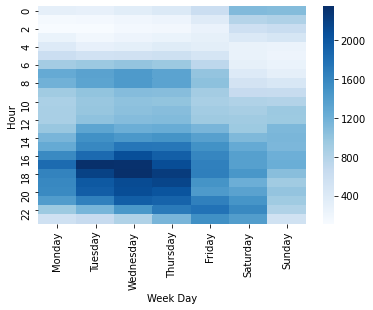

In [16]:
import seaborn as sns
#Plot a heatmap of the data
#Change the color map to blue (default is red)
sns.heatmap(weekly_data, cmap='Blues')
plt.show()

# Points of Interest

In [17]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [18]:
#geopy is a library which finds distance between latitude and longitude
import geopy.distance

In [19]:
#Check to make sure latitude and longitude are in the right order
metro_art_coordinates = (40.7794, -73.9632)
empire_state_building_coordinates = (40.7484, -73.9857)
distance = geopy.distance.distance(metro_art_coordinates, empire_state_building_coordinates)
print(distance)  # gives distance in km
print(distance.mi)  # in miles

3.9319431838516716 km
2.443196223959372


In [20]:
#Easy way to convert our latitude and longitude columns to tuples
print(uber_data[["Lat", "Lon"]].apply(lambda x: tuple(x),axis=1))

0         (40.7586, -73.9706)
1         (40.7605, -73.9994)
2          (40.732, -73.9999)
3         (40.7635, -73.9793)
4         (40.7204, -74.0047)
                 ...         
796116    (40.7285, -73.9846)
796117    (40.7615, -73.9868)
796118     (40.677, -73.9515)
796119    (40.7225, -74.0038)
796120    (40.7199, -73.9884)
Length: 796121, dtype: object


In [21]:
#Using the geopy version may take too long, so we will use the haversine formula instead
from math import radians, cos, sin, asin, sqrt

def haversine(coordinates1, coordinates2):

    lon1 = coordinates1[1]
    lat1 = coordinates1[0]
    lon2 = coordinates2[1]
    lat2 = coordinates2[0]
    #Change to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    
    # Apply the harversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956
    return c * r
print(haversine(metro_art_coordinates, empire_state_building_coordinates))

2.442501323483997


In [22]:
#Now, we can find the distances to both attractions
uber_data["Distance MM"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(metro_art_coordinates,tuple(x)),axis=1)
uber_data["Distance ESB"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(empire_state_building_coordinates,tuple(x)),axis=1)
print(uber_data["Distance MM"].head(5))
print(uber_data["Distance ESB"].head(5))

0    1.487358
1    2.299140
2    3.794105
3    1.383450
4    4.615925
Name: Distance MM, dtype: float64
0    1.058178
1    1.100642
2    1.354266
3    1.094999
4    2.173858
Name: Distance ESB, dtype: float64


In [23]:
#Summarize the data
print(uber_data[["Distance MM", "Distance ESB"]].describe())

         Distance MM   Distance ESB
count  796121.000000  796121.000000
mean        3.868244       2.723783
std         3.200848       3.276343
min         0.037592       0.000000
25%         1.863763       0.976621
50%         3.329218       1.726115
75%         4.691434       3.037256
max        86.770131      88.188585


In [24]:
#Using boolean indexing, we can sum to find the count within a specified range
print((uber_data[["Distance MM", "Distance ESB"]] < .25).sum())

Distance MM      2764
Distance ESB    15133
dtype: int64


In [25]:
import numpy as np
#Distance range takes a start, end (non-inclusive) and step amount
distance_range = np.arange(.1,5.1,.1)
print(distance_range)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [26]:
#Run our analysis for each distance
distance_data = [(uber_data[["Distance MM", "Distance ESB"]] < dist).sum() for dist in distance_range]
print(distance_data)

[Distance MM      575
Distance ESB    2387
dtype: int64, Distance MM     1776
Distance ESB    9661
dtype: int64, Distance MM      4566
Distance ESB    22166
dtype: int64, Distance MM      8783
Distance ESB    42427
dtype: int64, Distance MM     13606
Distance ESB    68011
dtype: int64, Distance MM     20770
Distance ESB    92650
dtype: int64, Distance MM      29408
Distance ESB    119621
dtype: int64, Distance MM      38912
Distance ESB    147815
dtype: int64, Distance MM      50497
Distance ESB    177759
dtype: int64, Distance MM      63072
Distance ESB    206056
dtype: int64, Distance MM      75474
Distance ESB    240003
dtype: int64, Distance MM      89442
Distance ESB    277785
dtype: int64, Distance MM     105692
Distance ESB    311312
dtype: int64, Distance MM     123431
Distance ESB    335385
dtype: int64, Distance MM     141656
Distance ESB    355731
dtype: int64, Distance MM     157194
Distance ESB    375017
dtype: int64, Distance MM     174148
Distance ESB    393510
dtype: in

In [27]:
#Concat
distance_data = pd.concat(distance_data, axis=1)
print(distance_data)

                0     1      2      3      4      5       6       7       8   \
Distance MM    575  1776   4566   8783  13606  20770   29408   38912   50497   
Distance ESB  2387  9661  22166  42427  68011  92650  119621  147815  177759   

                  9   ...      40      41      42      43      44      45  \
Distance MM    63072  ...  512662  529702  546998  563198  575552  588588   
Distance ESB  206056  ...  656735  661066  665748  670373  674744  678522   

                  46      47      48      49  
Distance MM   597941  614256  621624  626604  
Distance ESB  682262  685487  688588  691884  

[2 rows x 50 columns]


In [28]:
#Transpose and add in the index
distance_data = distance_data.transpose()
distance_data.index = distance_range
print(distance_data)

     Distance MM  Distance ESB
0.1          575          2387
0.2         1776          9661
0.3         4566         22166
0.4         8783         42427
0.5        13606         68011
0.6        20770         92650
0.7        29408        119621
0.8        38912        147815
0.9        50497        177759
1.0        63072        206056
1.1        75474        240003
1.2        89442        277785
1.3       105692        311312
1.4       123431        335385
1.5       141656        355731
1.6       157194        375017
1.7       174148        393510
1.8       190108        412560
1.9       204501        434040
2.0       219190        453986
2.1       234681        472681
2.2       250469        489396
2.3       265164        502460
2.4       276425        518076
2.5       291165        532569
2.6       306739        544541
2.7       318762        557718
2.8       329219        571684
2.9       341297        583354
3.0       354514        592929
3.1       369129        603990
3.2     

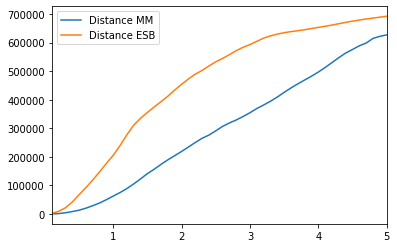

In [29]:
#And plot
distance_data.plot(kind="line")
plt.show()

# Mapping Data with Folium

In [30]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [31]:
#Folium can let us map geographical data, first get a base map with latitude and longitude
import folium as folium
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
uber_map

In [32]:
#Pick the first five latitude/longitude combinations
lat = uber_data["Lat"].values[:5]
lon = uber_data["Lon"].values[:5]

uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#Marker let's you drop markers on the map
#You can also add text to the markers with the popup argument
for i in range(len(lat)):
    folium.Marker((lat[i], lon[i]), popup="Rider {}".format(i+1)).add_to(uber_map)
uber_map

In [33]:
from folium.plugins import HeatMap

lat_lon = uber_data[["Lat", "Lon"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#A heatmap can be plotted like so... the radius argument controls the radius of each point within the map
#You can zoom in on this map to see more specific areas, or out to see more general
HeatMap(lat_lon, radius=13).add_to(uber_map)
uber_map

In [34]:
lat_lon = uber_data[["Lat", "Lon"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
#A bigger radius (and more zoom) can let us observe drop offs outside of the city that happen often
#Such as the airport
HeatMap(lat_lon, radius=30).add_to(uber_map)
uber_map

In [35]:
#We can also give a weight to either give different values to points, or to make the graphs less dense looking
uber_data["Weight"] = .5
lat_lon = uber_data[["Lat", "Lon", "Weight"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#Now let's increase radius since the weights are less
HeatMap(lat_lon, radius=15).add_to(uber_map)
uber_map

In [36]:
#Let's get the points that are within distance of either point of interest
#There won't be overlap if we use only points that are .25 mile away
i = uber_data[["Distance MM", "Distance ESB"]] < .25
print(i)

        Distance MM  Distance ESB
0             False         False
1             False         False
2             False         False
3             False         False
4             False         False
...             ...           ...
796116        False         False
796117        False         False
796118        False         False
796119        False         False
796120        False         False

[796121 rows x 2 columns]


In [37]:
#Take data where either one is true
i = i.any(axis=1)
print(i)

0         False
1         False
2         False
3         False
4         False
          ...  
796116    False
796117    False
796118    False
796119    False
796120    False
Length: 796121, dtype: bool


In [38]:
#This is our map data
map_data = uber_data[i].copy()
print(map_data)

                 Date/Time      Lat      Lon    Base  Distance MM  \
5      2014-07-01 00:35:00  40.7487 -73.9869  B02512     2.455439   
13     2014-07-01 02:07:00  40.7471 -73.9872  B02512     2.559080   
17     2014-07-01 03:20:00  40.7498 -73.9813  B02512     2.252287   
31     2014-07-01 05:22:00  40.7489 -73.9874  B02512     2.456893   
104    2014-07-01 07:39:00  40.7782 -73.9590  B02512     0.234702   
...                    ...      ...      ...     ...          ...   
795863 2014-07-31 13:02:00  40.7463 -73.9888  B02764     2.648655   
795910 2014-07-31 15:35:00  40.7460 -73.9864  B02764     2.605797   
795925 2014-07-31 16:05:00  40.7449 -73.9866  B02764     2.678014   
795940 2014-07-31 16:32:00  40.7501 -73.9825  B02764     2.260816   
796101 2014-07-31 22:29:00  40.7495 -73.9820  B02764     2.286599   

        Distance ESB  Weight  
5           0.066098     0.5  
13          0.119218     0.5  
17          0.249626     0.5  
31          0.095389     0.5  
104         2.48

In [39]:
#Let's draw on a heatmap with the locations within the radius
#Notice that one heatmap is a semi-circle because drop offs can't happen to the left of it
map_data["Weight"] = .1
lat_lon = map_data[["Lat", "Lon", "Weight"]].values
uber_map = folium.Map(location=[40.7728, -74.0060], zoom_start=13)
HeatMap(lat_lon, radius=10).add_to(uber_map)
uber_map

In [40]:
#Let's grab only the date and hour by replacing the other parts with 0
uber_data["Date_Hour"] = uber_data["Date/Time"].apply(lambda x: x.replace(microsecond=0,second=0,minute=0))
print(uber_data["Date_Hour"])

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:00:00
                 ...        
796116   2014-07-31 23:00:00
796117   2014-07-31 23:00:00
796118   2014-07-31 23:00:00
796119   2014-07-31 23:00:00
796120   2014-07-31 23:00:00
Name: Date_Hour, Length: 796121, dtype: datetime64[ns]


In [41]:
from datetime import datetime
#Take only the first week of data
map_data = uber_data[uber_data["Date/Time"] < datetime(2014,7,8)].copy()
map_data["Weight"] = .5
#Randomly sample 1/3 the values in each group
map_data = map_data.groupby('Date_Hour').apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x)/3)).values.tolist())
#Get the index
date_hour_index = [x.strftime("%m/%d/%Y, %H:%M:%S") for x in map_data.index]
#Get the data in list form (each element of this bigger list will be a list of lists with lat/lon/weight)
#Each element of the bigger list is a for a date/hour combo
date_hour_data = map_data.tolist()

In [42]:
from folium.plugins import HeatMapWithTime
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#A heatmap with time can now be out together
hm = HeatMapWithTime(date_hour_data, index=date_hour_index)
hm.add_to(uber_map)
uber_map

# Testing Seasonality

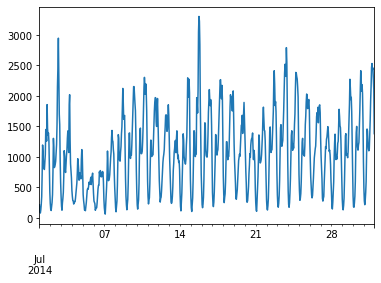

In [43]:
#Recall the seasonality we saw before
hourly_data.plot(kind='line')
plt.show()

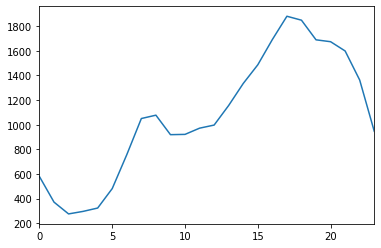

In [44]:
#What about the hourly trends?
h = hourly_data.groupby(hourly_data.index.hour).mean()
h.plot(kind="line")
plt.show()

In [45]:
#Something else of interest is the difference in hourly trends for weekdays and weekends
#We will index with i for weekdays
i = hourly_data.index.weekday <= 4

h_week = hourly_data.loc[i].groupby(hourly_data.loc[i].index.hour).mean()
h_weekend = hourly_data.loc[~i].groupby(hourly_data.loc[~i].index.hour).mean()
h = pd.concat([h_week, h_weekend], axis=1)
h.columns = ["Weekday", "Weekend"]
print(h)

        Weekday   Weekend
0    397.913043  1100.125
1    219.826087   808.875
2    160.391304   609.125
3    242.913043   451.500
4    346.565217   258.625
5    561.304348   252.750
6    922.391304   280.125
7   1290.695652   357.375
8   1279.086957   496.000
9   1008.173913   662.250
10   959.130435   812.250
11   988.695652   922.500
12  1017.086957   938.375
13  1195.869565  1040.875
14  1403.652174  1134.125
15  1583.130435  1205.125
16  1828.434783  1293.625
17  2080.478261  1301.125
18  2050.739130  1262.625
19  1900.826087  1076.625
20  1845.695652  1176.000
21  1734.217391  1205.125
22  1416.956522  1203.500
23   936.869565   974.750


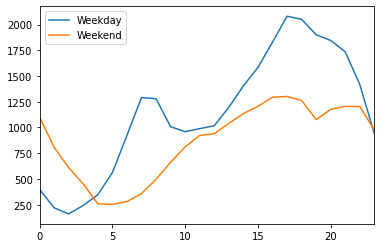

In [46]:
#And plot to see the difference
h.plot(kind='line')
plt.show()

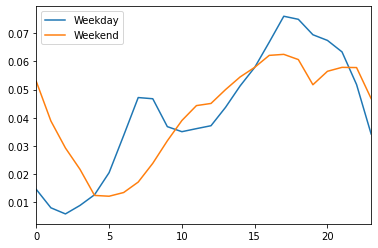

In [47]:
#We can also divide by the total number of trips for each to normalize and have each be a percent of total trips in a day
(h / h.sum()).plot(kind='line')
plt.show()

In [48]:
#We can finish our assessment of whether or not we see hourly effects by using a t-test to see if each hour
#has a statistically different proportion of rides for weekends vs. weekdays
from scipy.stats import ttest_ind

#The functions takes two samples and returns the t-stat and the p-value denoting the null hypothesis that they are the same
print(ttest_ind([100,105,110], [200,230,210]))

Ttest_indResult(statistic=-11.67434463174037, pvalue=0.0003078015152715608)


In [49]:
#Now for each day, let's normalize by the total number of rides in the day
hourly_data_pct = hourly_data.groupby(hourly_data.index.date).apply(lambda x: x / x.sum())
print(hourly_data_pct)

2014-07-01 00:00:00    0.010175
2014-07-01 01:00:00    0.005229
2014-07-01 02:00:00    0.003863
2014-07-01 03:00:00    0.006312
2014-07-01 04:00:00    0.010505
                         ...   
2014-07-31 19:00:00    0.072449
2014-07-31 20:00:00    0.073343
2014-07-31 21:00:00    0.067827
2014-07-31 22:00:00    0.062580
2014-07-31 23:00:00    0.041203
Name: Date/Time, Length: 744, dtype: float64


In [50]:
#For each group of hours, we will apply a function to test the null hypothesis where the first sample is
#weekdays and the second is weekends found by taking the days of the index
t_stats = hourly_data_pct.groupby(hourly_data_pct.index.hour).apply(lambda x: ttest_ind(x[x.index.weekday<=4], x[x.index.weekday>4])[0])
print(t_stats)

0    -13.172607
1    -12.855798
2    -13.484048
3     -9.418578
4      0.606973
5      6.839349
6     11.710600
7     10.318852
8      9.528385
9      3.162258
10    -4.173500
11    -5.636194
12    -3.781312
13    -2.184142
14    -1.460863
15    -0.043964
16     1.724801
17     3.515413
18     3.244416
19     4.183996
20     2.624601
21     1.428450
22    -1.055840
23    -1.616064
Name: Date/Time, dtype: float64


C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


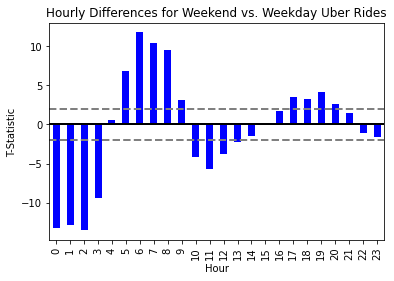

In [51]:
ax = t_stats.plot('bar', color='blue')
ax.axhline(1.96, linestyle='--', color='grey', linewidth=2)
ax.axhline(0, color='black', linewidth=2)
ax.axhline(-1.96, linestyle='--', color='grey', linewidth=2)
plt.xlabel("Hour")
plt.ylabel("T-Statistic")
plt.title("Hourly Differences for Weekend vs. Weekday Uber Rides")
plt.show()